# Azure Computer Vision 4 (Florence)

## Fashion Visual Search - Search using an image or a prompt

![Image](images/florence.jpg)

![Image](images/fashionheader.png)

<br>
<i>Note: this image was generated with Azure Open AI Dall-e 2</i>

### Visual search with vector embeddings
**Vector embeddings** are a way of representing content such as text or images as vectors of real numbers in a high-dimensional space. These embeddings are often learned from large amounts of textual and visual data using machine learning algorithms like neural networks. Each dimension of the vector corresponds to a different feature or attribute of the content, such as its semantic meaning, syntactic role, or context in which it commonly appears. By representing content as vectors, we can perform mathematical operations on them to compare their similarity or use them as inputs to machine learning models.

![Image](images/embeddings.jpg)


### Business applications
- **Digital asset management**: Image retrieval can be used to manage large collections of digital images, such as in museums, archives, or online galleries. Users can search for images based on visual features and retrieve the images that match their criteria.
- **Medical image retrieval**: Image retrieval can be used in medical imaging to search for images based on their diagnostic features or disease patterns. This can help doctors or researchers to identify similar cases or track disease progression.
- **Security and surveillance**: Image retrieval can be used in security and surveillance systems to search for images based on specific features or patterns, such as in, people & object tracking, or threat detection.
- **Forensic image retrieval**: Image retrieval can be used in forensic investigations to search for images based on their visual content or metadata, such as in cases of cyber-crime.
- **E-commerce**: Image retrieval can be used in online shopping applications to search for similar products based on their features or descriptions or provide recommendations based on previous purchases.
- **Fashion and design**: Image retrieval can be used in fashion and design to search for images based on their visual features, such as color, pattern, or texture. This can help designers or retailers to identify similar products or trends.

### Visual Search Process
![Image](images/fashionprocess.png)

### Image Retrieval with Azure Computer Vision Documentation
- https://learn.microsoft.com/en-us/azure/cognitive-services/computer-vision/concept-image-retrieval
- https://learn.microsoft.com/en-us/azure/cognitive-services/computer-vision/how-to/image-retrieval

### Demo images
Demo images are a sample of this collection of images: https://www.kaggle.com/competitions/h-and-m-personalized-fashion-recommendations/data
<br><br>
> Serge Retkowsky | Microsoft | https://github.com/retkowsky | 3rd of May, 2023

## 1. <a name="chapt1"></a> Librairies

In [1]:
import datetime
import glob
import json
import os
import random
import sys
import time

from dotenv import load_dotenv
from PIL import Image

In [2]:
# Getting Azure CV endpoint and key from the azure.env file

load_dotenv("azure.env")
key = os.getenv("azure_cv_key")
endpoint = os.getenv("azure_cv_endpoint")

### Importing our specific functions

In [3]:
pyfile = "azure.py"

print("Python file:", pyfile, "Date:", time.ctime(os.path.getmtime(pyfile)))

Python file: azure.py Date: Sun Jul  9 23:52:26 2023


In [4]:
from azure import (
    describe_image_with_AzureCV4,
    get_image_from_url,
    get_results_using_image,
    get_results_using_prompt,
    remove_background,
    side_by_side_images,
    view_image,
)

## 2. <a name="chapt2"></a> Informations

In [7]:
sys.version

'3.10.6 (main, May 29 2023, 11:10:38) [GCC 11.3.0]'

In [8]:
print("Today is", datetime.datetime.today())

Today is 2023-07-10 00:00:26.427408


## 3. <a name="chapt3"></a> Our products images

In [9]:
IMAGES_DIR = "/data/fashion"

In [11]:
image_files = glob.glob(IMAGES_DIR + "/*")

print("Directory of images:", IMAGES_DIR)
print("Total number of catalog images =", "{:,}".format(len(image_files)))

Directory of images: /data/fashion
Total number of catalog images = 20


### Some images

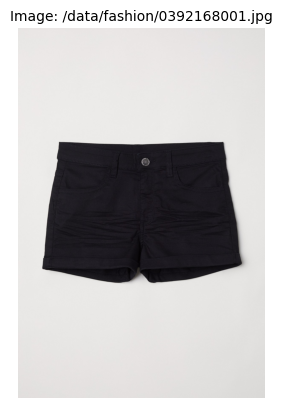

Automatic analysis of the image using Azure Computer Vision 4.0:

   Main caption:
    a pair of black shorts = 1.000

   Detected tags:
    clothing           = 0.996
    shorts             = 0.955
    trouser            = 0.940
    person             = 0.638


In [12]:
idx = 1

view_image(image_files[idx])
describe_image_with_AzureCV4(image_files[idx])

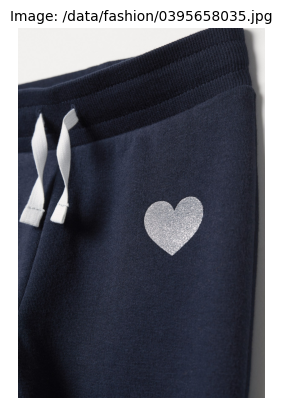

Automatic analysis of the image using Azure Computer Vision 4.0:

   Main caption:
    a pair of shorts with a heart on it = 1.000

   Detected tags:
    accessory          = 0.933
    stitch             = 0.866
    bag                = 0.777
    black              = 0.698


In [17]:
idx = 19

view_image(image_files[idx])
describe_image_with_AzureCV4(image_files[idx])

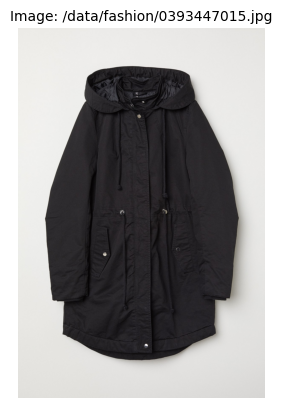

Automatic analysis of the image using Azure Computer Vision 4.0:

   Main caption:
    a black coat on a white wall = 1.000

   Detected tags:
    clothing           = 0.998
    coat               = 0.958
    outerwear          = 0.937
    sleeve             = 0.888
    fashion design     = 0.879
    casual dress       = 0.870
    top                = 0.855
    button             = 0.852
    pocket             = 0.848
    indoor             = 0.690
    jacket             = 0.655
    fashion            = 0.652
    person             = 0.620
    clothes            = 0.532


In [18]:
idx = int(random.uniform(0, len(image_files)))

view_image(image_files[idx])
describe_image_with_AzureCV4(image_files[idx])

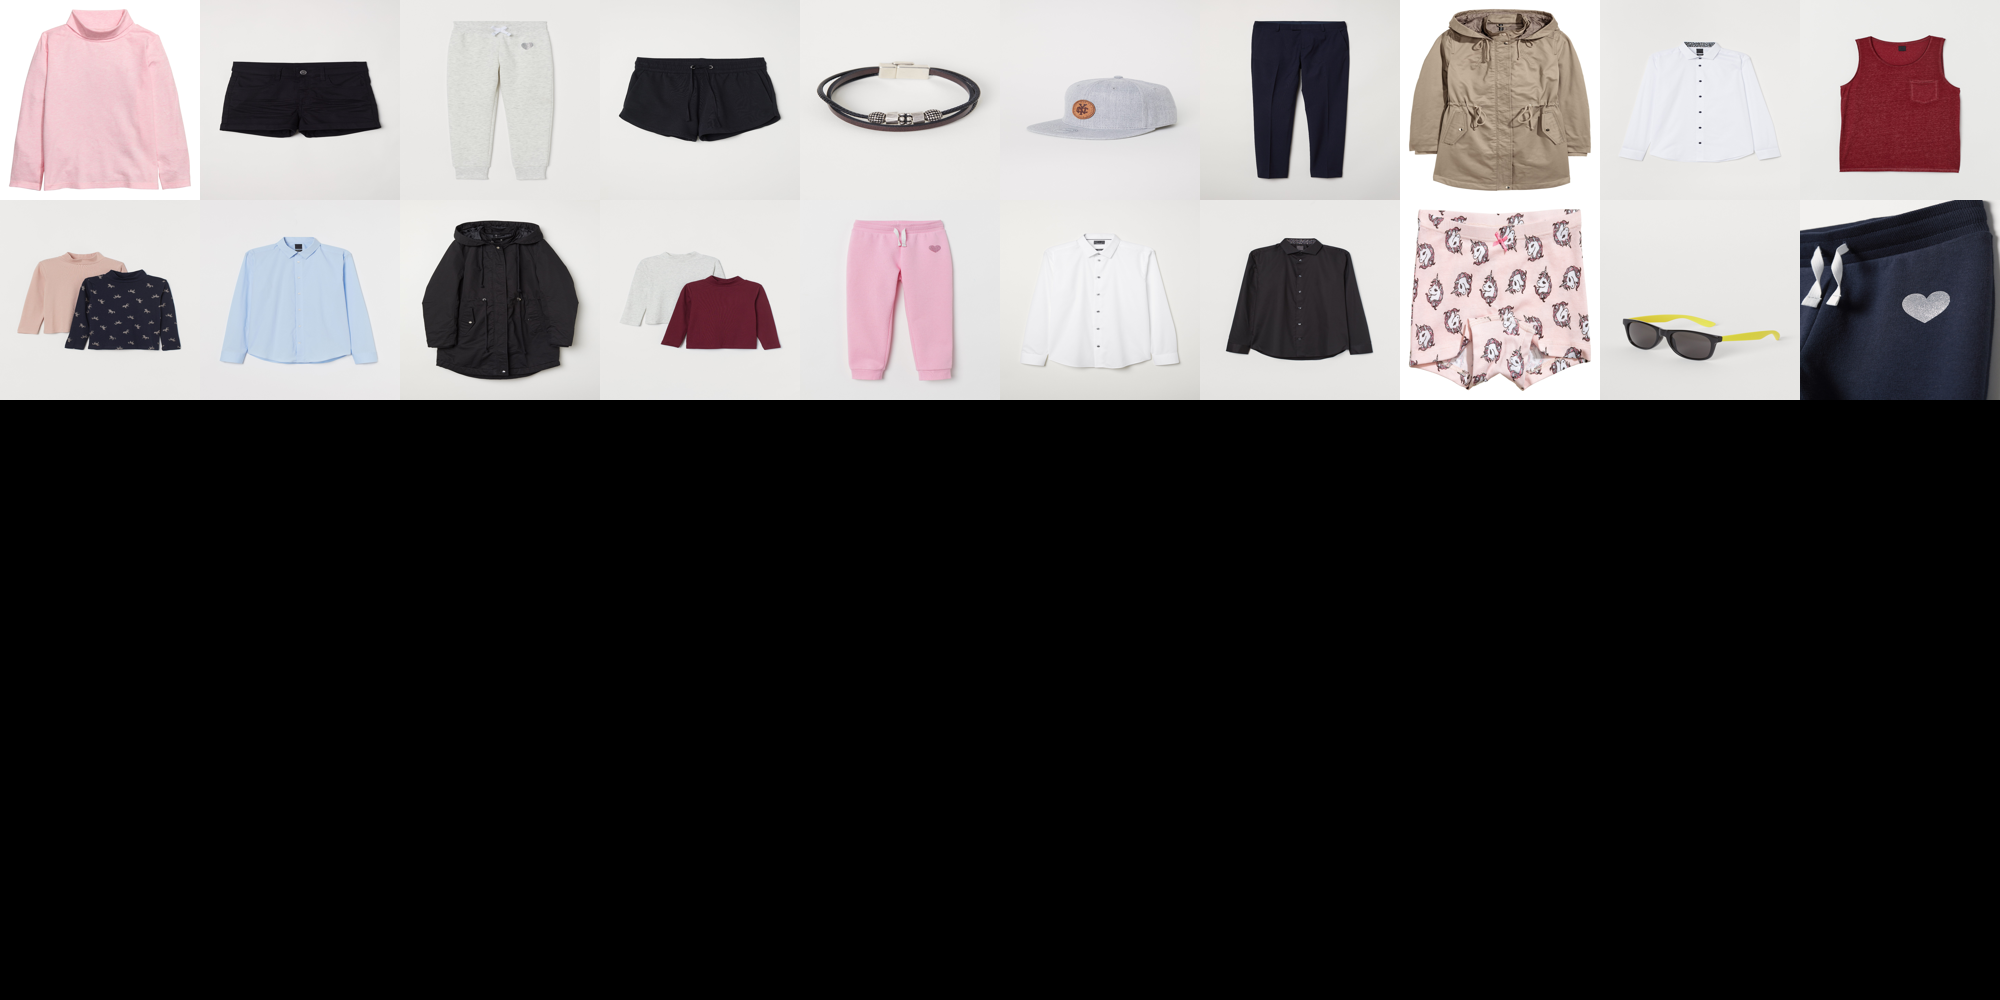

In [20]:
num_images_per_row = 10
num_images_per_col = 5

img_size = 200
start = 0
samples = image_files[start : start + (num_images_per_row * num_images_per_col)]

samples_images = Image.new(
    "RGB", (num_images_per_row * img_size, num_images_per_col * img_size)
)

for idx, image_file in enumerate(samples):
    img = Image.open(image_file)
    img = img.resize((img_size, img_size))
    x = (idx % num_images_per_row) * img_size
    y = (idx // num_images_per_row) * img_size
    samples_images.paste(img, (x, y))

samples_images

## 4. <a name="chapt4"></a> Loading vector embeddings

In [22]:
JSON_DIR = "/data/json"

glob.glob(JSON_DIR + "/*.json")

['/data/json/img_embed_08Jul2023_190639.json']

In [23]:
print("Importing vectors embeddings...")

jsonfiles = [entry.name for entry in os.scandir(JSON_DIR) if entry.is_file()]
jsonfiles = [f for f in jsonfiles if os.path.isfile(os.path.join(JSON_DIR, f))]

# Get the most recent file
modification_times = [
    (f, os.path.getmtime(os.path.join(JSON_DIR, f))) for f in jsonfiles
]
modification_times.sort(key=lambda x: x[1], reverse=True)
most_recent_file = JSON_DIR + "/" + modification_times[0][0]

# Loading the most recent file
print(f"Loading the most recent file of the vector embeddings: {most_recent_file}")

with open(most_recent_file) as f:
    list_emb = json.load(f)

print(f"\nDone: number of imported vector embeddings = {len(list_emb):,}")

Importing vectors embeddings...
Loading the most recent file of the vector embeddings: /data/json/img_embed_08Jul2023_190639.json

Done: number of imported vector embeddings = 21


## 5. <a name="chapt5"></a> Visual search using a field image

We can use a reference image and find the most similar images.
In this demo we will use the reference image without its background
(Azure Computer Vision 4 can automatically remove the background). The search will be made using the image without its background.


In [24]:
print("Total number of catalog images =", "{:,}".format(len(image_files)))

Total number of catalog images = 20


In [27]:
TEST_DIR = "test"

test_images = glob.glob(f"{TEST_DIR}/*")
print(f"Total number of test images = {len(test_images)}")

Total number of test images = 6


### Test 1

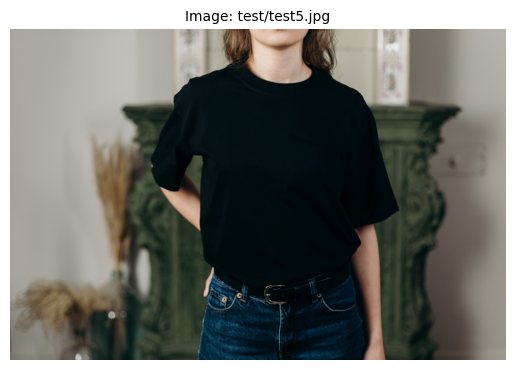

Automatic analysis of the image using Azure Computer Vision 4.0:

   Main caption:
    a woman in a black shirt = 1.000

   Detected tags:
    person             = 0.994
    clothing           = 0.994
    shoulder           = 0.965
    jeans              = 0.958
    casual dress       = 0.958
    wall               = 0.957
    indoor             = 0.955
    top                = 0.943
    waist              = 0.925
    denim              = 0.905
    blouse             = 0.849
    sleeve             = 0.785
    standing           = 0.681
    fashion            = 0.586
    jean               = 0.578


In [28]:
reference_image = test_images[0]

view_image(reference_image)
describe_image_with_AzureCV4(reference_image)

Removing background from the image using Azure Computer Vision 4.0...
Done


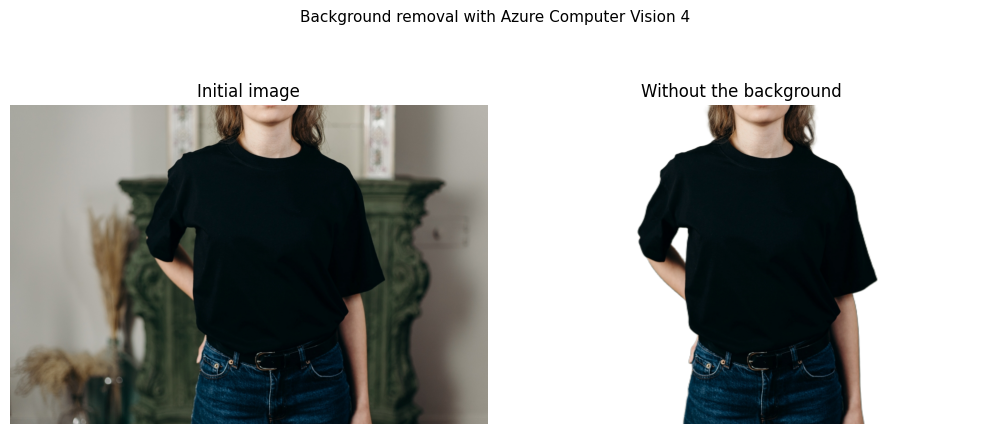

In [29]:
nobackground_image = remove_background(reference_image)
side_by_side_images(reference_image, nobackground_image)

Top 3 images:

001 /data/fashion/0395730018.jpg with similarity index = 0.6056308623527806
002 /data/fashion/0395127006.jpg with similarity index = 0.6017369650377962
003 /data/fashion/0394522001.jpg with similarity index = 0.5518488186849627


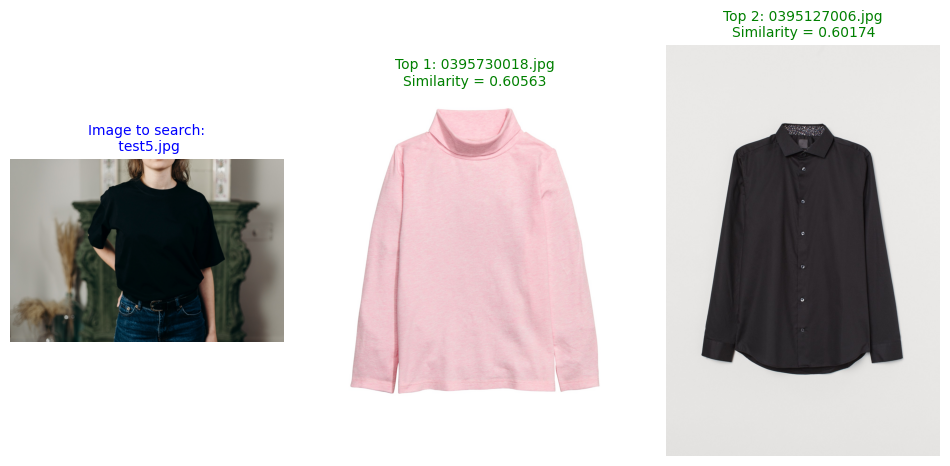

 2023-07-10 00:20:16 Powered by Azure Computer Vision Florence


,image_file,similarity
0,/data/fashion/0395730018.jpg,0.605631
16,/data/fashion/0395127006.jpg,0.601737
15,/data/fashion/0394522001.jpg,0.551849
3,/data/fashion/0396135007.jpg,0.523157
20,NaN,0.519315
12,/data/fashion/0393447015.jpg,0.517568
10,/data/fashion/0395730037.jpg,0.514936
7,/data/fashion/0393447010.jpg,0.507583
18,/data/fashion/0394292008.jpg,0.507304
2,/data/fashion/0395658042.jpg,0.494334


In [31]:
get_results_using_image(
    reference_image, nobackground_image, image_files, list_emb, topn=3, disp=True
)

### Test 2

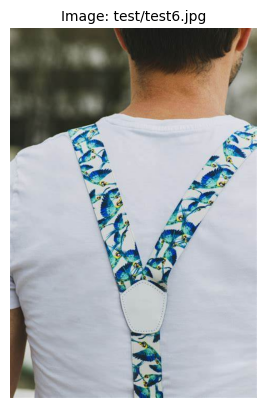

In [32]:
reference_image = test_images[1]

view_image(reference_image)

Removing background from the image using Azure Computer Vision 4.0...
Done


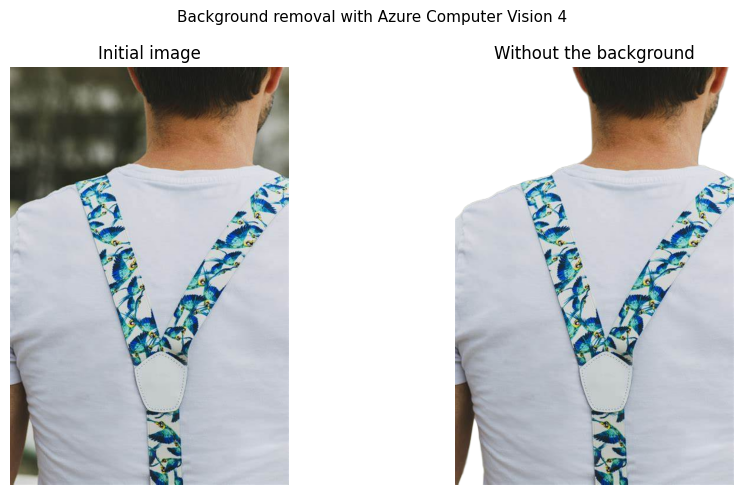

In [33]:
nobackground_image = remove_background(reference_image)
side_by_side_images(reference_image, nobackground_image)

Top 6 images:

001 /data/fashion/0392168001.jpg with similarity index = 0.42951118313650877
002 /data/fashion/0395658042.jpg with similarity index = 0.4275916117545758
003 /data/fashion/0395730040.jpg with similarity index = 0.42282780148747445
004 /data/fashion/0395658038.jpg with similarity index = 0.408189965489465
005 /data/fashion/0394522001.jpg with similarity index = 0.39864743569248823
006 /data/fashion/0391750016.jpg with similarity index = 0.39353499092521127


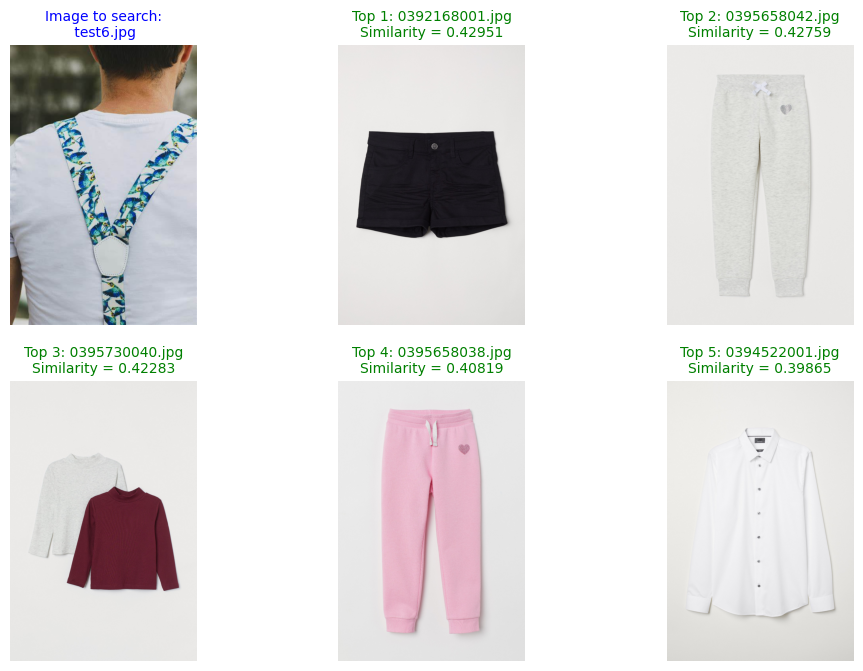

 2023-07-10 00:20:40 Powered by Azure Computer Vision Florence


,image_file,similarity
1,/data/fashion/0392168001.jpg,0.429511
2,/data/fashion/0395658042.jpg,0.427592
13,/data/fashion/0395730040.jpg,0.422828
14,/data/fashion/0395658038.jpg,0.408190
15,/data/fashion/0394522001.jpg,0.398647
6,/data/fashion/0391750016.jpg,0.393535
20,NaN,0.390172
4,/data/fashion/0396690020.jpg,0.374639
17,/data/fashion/0395864060.jpg,0.370035
0,/data/fashion/0395730018.jpg,0.363989


In [34]:
get_results_using_image(
    reference_image, nobackground_image, image_files, list_emb, topn=6, disp=True
)

## 6. <a name="chapt6"></a> Visual search using some text

We can use some prompt (text) to find some articles in our catalog images.

### Test 2

In [39]:
query = "shorts"


Similar images using query = shorts


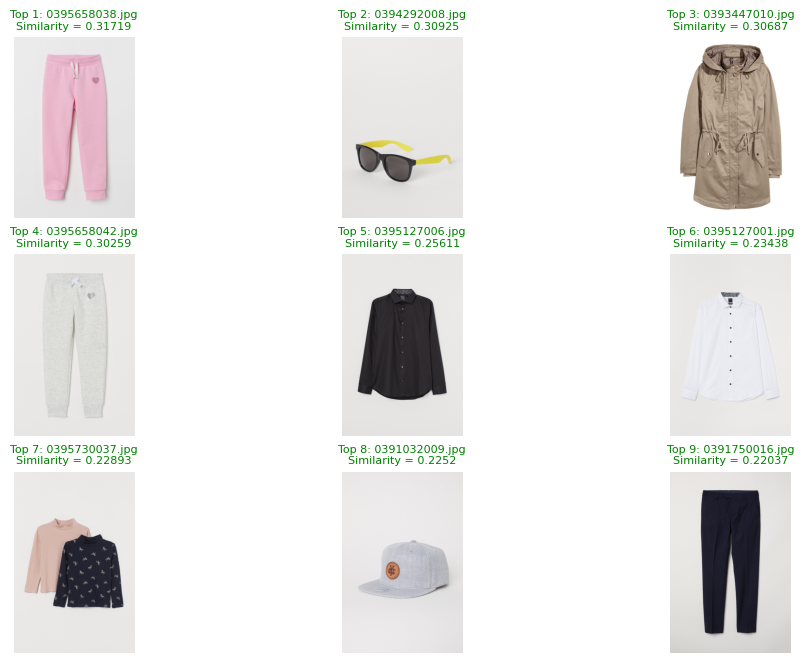

 2023-07-10 00:22:03 Powered by Azure Computer Vision Florence


,image_file,similarity
14,/data/fashion/0395658038.jpg,0.317186
18,/data/fashion/0394292008.jpg,0.309249
7,/data/fashion/0393447010.jpg,0.306869
2,/data/fashion/0395658042.jpg,0.302594
16,/data/fashion/0395127006.jpg,0.256108
8,/data/fashion/0395127001.jpg,0.234380
10,/data/fashion/0395730037.jpg,0.228932
5,/data/fashion/0391032009.jpg,0.225198
6,/data/fashion/0391750016.jpg,0.220374
0,/data/fashion/0395730018.jpg,0.216368


In [40]:
get_results_using_prompt(query, image_files, list_emb, topn=9, disp=False)

### Test 1

In [48]:
query = "dress with flowers"


Similar images using query = dress with flowers


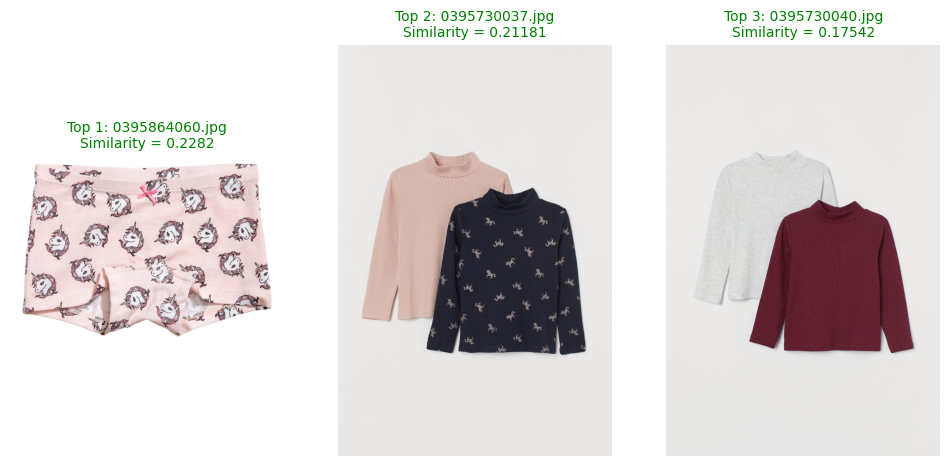

 2023-07-10 00:23:03 Powered by Azure Computer Vision Florence


,image_file,similarity
17,/data/fashion/0395864060.jpg,0.228196
10,/data/fashion/0395730037.jpg,0.211811
13,/data/fashion/0395730040.jpg,0.175415
0,/data/fashion/0395730018.jpg,0.172732
5,/data/fashion/0391032009.jpg,0.167146
11,/data/fashion/0392938035.jpg,0.165948
7,/data/fashion/0393447010.jpg,0.151476
16,/data/fashion/0395127006.jpg,0.150688
1,/data/fashion/0392168001.jpg,0.147246
3,/data/fashion/0396135007.jpg,0.137478


In [49]:
get_results_using_prompt(query, image_files, list_emb, topn=3, disp=False)

### Test 2

In [42]:
query = "black shirt"


Similar images using query = black shirt


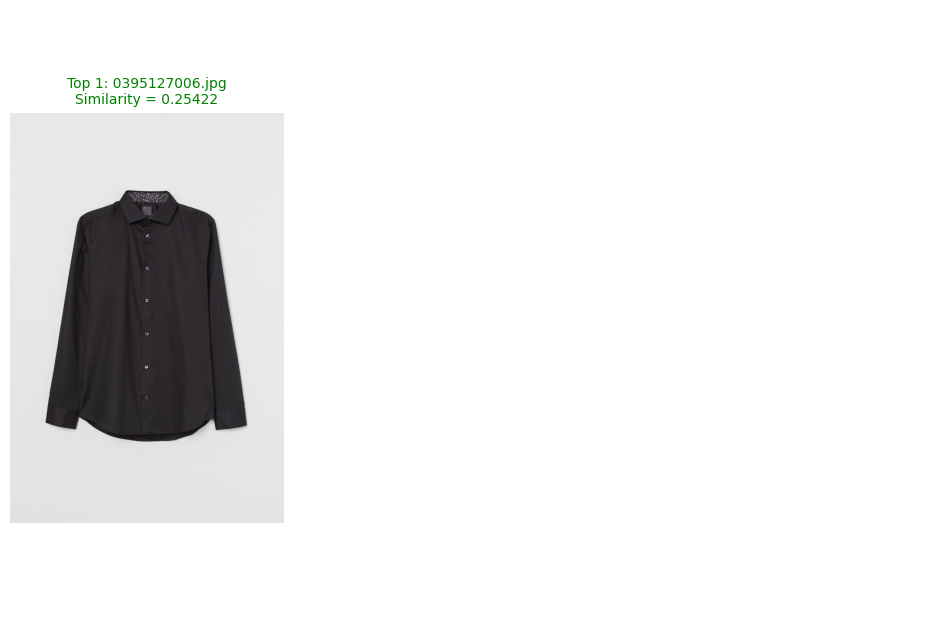

 2023-07-10 00:22:20 Powered by Azure Computer Vision Florence


,image_file,similarity
16,/data/fashion/0395127006.jpg,0.254222
17,/data/fashion/0395864060.jpg,0.250056
7,/data/fashion/0393447010.jpg,0.235328
18,/data/fashion/0394292008.jpg,0.223270
3,/data/fashion/0396135007.jpg,0.217555
5,/data/fashion/0391032009.jpg,0.216408
0,/data/fashion/0395730018.jpg,0.215362
12,/data/fashion/0393447015.jpg,0.205505
11,/data/fashion/0392938035.jpg,0.191801
10,/data/fashion/0395730037.jpg,0.188792


In [43]:
get_results_using_prompt(query, image_files, list_emb, topn=1, disp=False)